<a href="https://colab.research.google.com/github/henrikass/AI_Bootcamp/blob/master/Flowers_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

In [0]:
os.environ['KAGGLE_USERNAME'] = "henrikass" 
os.environ['KAGGLE_KEY'] = "50889c9eb27590883274265105d1cb11" 

In [0]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 99% 222M/225M [00:03<00:00, 77.5MB/s]
100% 225M/225M [00:03<00:00, 60.8MB/s]


In [0]:
ls

flowers-recognition.zip  sample_data/


In [0]:
!unzip flowers-recognition.zip

In [0]:
ls


flowers/  flowers-recognition.zip  sample_data/


In [0]:
cd flowers/

/content/flowers


In [0]:
ls -a

./  ../  daisy/  dandelion/  rose/  sunflower/  tulip/


In [0]:
cd dandelion/

/content/flowers/dandelion


In [0]:
ls -a

In [0]:
rm flickr.pyc

In [0]:
cd ./

/content/flowers/dandelion


In [0]:
cd ..

/content/flowers


In [0]:
ls

daisy/  dandelion/  rose/  sunflower/  tulip/


In [0]:
DAISY_DIR = './flowers/daisy'
ROSE_DIR = './flowers/rose'
DANDELION_DIR = './flowers/dandelion'
TULIP_DIR = './flowers/tulip'
SUNFLOWER_DIR = './flowers/sunflower'

In [0]:
pwd

'/content/flowers'

In [0]:

cd ..

/content


In [0]:
pwd

'/content'

In [0]:
from tqdm import tqdm

In [0]:
import cv2
import numpy as np

In [0]:
IMG_SIZE = 100
X = []
Z = []

In [0]:
def make_df(flower, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = flower
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))
    print(len(X))

In [0]:
make_df('Dandelion', DANDELION_DIR)
make_df('Tulip', TULIP_DIR)
make_df('Sunflower', SUNFLOWER_DIR)
make_df('Daisy', DAISY_DIR)
make_df('Rose', ROSE_DIR)

  3%|▎         | 25/984 [00:00<00:04, 239.27it/s]

1052


  4%|▎         | 27/734 [00:00<00:02, 263.61it/s]

2036


  4%|▍         | 33/769 [00:00<00:02, 301.57it/s]

2770


  3%|▎         | 24/784 [00:00<00:03, 235.20it/s]

3539


100%|██████████| 784/784 [00:02<00:00, 387.92it/s]

4323


In [0]:
cd flowers/dandelion/

/content/flowers/dandelion


In [0]:
rm .ipynb_checkpoints/

rm: cannot remove '.ipynb_checkpoints/': Is a directory


In [0]:
rm -rf .ipynb_checkpoints/

In [0]:
cd /

/


In [0]:
ls

bin/      dev/   lib32/  opt/   sbin/   tensorflow-2.0.0b1/  var/
boot/     etc/   lib64/  proc/  srv/    tmp/
content/  home/  media/  root/  swift/  tools/
datalab/  lib/   mnt/    run/   sys/    usr/


In [0]:
cd content/

/content


In [0]:
ls

flowers/  flowers-recognition.zip  flowers_test/  flowers_val/  sample_data/


In [0]:
type(X)

list

In [0]:
import random
import matplotlib.pyplot as plt

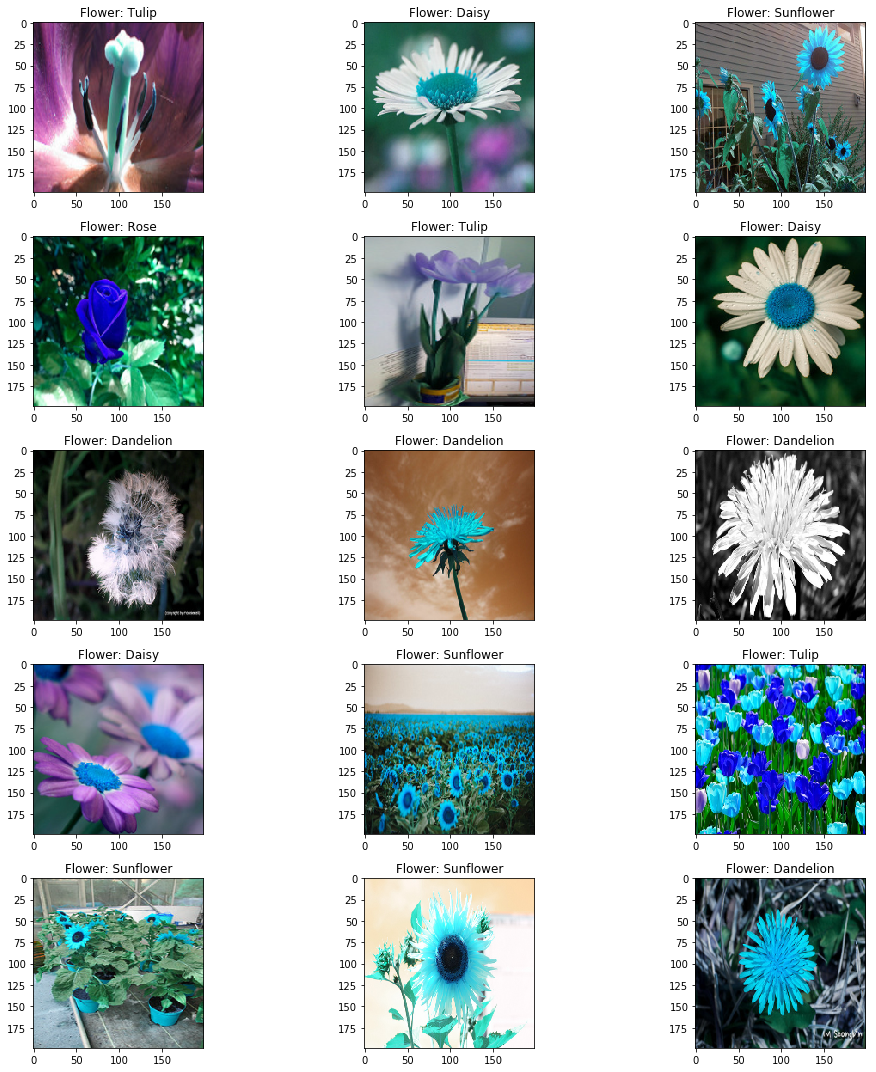

In [0]:
fig,ax=plt.subplots(5,3)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (3):
        l=random.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [0]:
from toai.imports import *

In [0]:
le = LabelEncoder()


In [0]:
y = le.fit_transform(Z)

In [0]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
y = to_categorical(y, 5)

In [0]:
X = np.array(X)

In [0]:
X = X / 255

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [0]:
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.50,random_state=42)

In [0]:
x_test.shape, x_val.shape, x_train.shape 

((649, 199, 199, 3), (648, 199, 199, 3), (3026, 199, 199, 3))

In [0]:
y_test.shape, y_val.shape, y_train.shape 

((649, 5), (648, 5), (3026, 5))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop, Nadam

In [0]:
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [0]:
model_1 = Sequential()

W0822 08:20:03.855904 140259910842240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
model_1.add(Conv2D(filters=32, kernel_size= 5, padding='same', 
                   activation='relu', input_shape= (IMG_SIZE, IMG_SIZE, 3)))

W0822 08:20:05.375918 140259910842240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 08:20:05.385859 140259910842240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model_1.add(MaxPooling2D(pool_size=(2,2)))

W0822 08:20:09.092643 140259910842240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
model_1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [0]:
model_1.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [0]:
model_1.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [0]:
model_1.add(Flatten())

In [0]:
model_1.add(Dense(512, activation='relu'))

In [0]:
model_1.add(Dense(5, activation='softmax'))

In [0]:
model_1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0822 08:20:16.567936 140259910842240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 08:20:16.597739 140259910842240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 199, 199, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 99, 99, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 49, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 96)        83040     
__________

In [0]:
History = model_1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=1)

W0822 07:46:32.058611 139936159504256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0822 07:46:32.132144 139936159504256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3026 samples, validate on 648 samples
Epoch 1/10
3026/3026 [==============================] - 15s 5ms/step - loss: 1.4124 - acc: 0.3797 - val_loss: 1.1271 - val_acc: 0.4969
Epoch 2/10
3026/3026 [==============================] - 7s 2ms/step - loss: 1.1014 - acc: 0.5479 - val_loss: 1.0199 - val_acc: 0.6173
Epoch 3/10
3026/3026 [==============================] - 7s 2ms/step - loss: 0.9794 - acc: 0.6147 - val_loss: 0.9327 - val_acc: 0.6466
Epoch 4/10
3026/3026 [==============================] - 7s 2ms/step - loss: 0.8460 - acc: 0.6702 - val_loss: 1.0184 - val_acc: 0.6019
Epoch 5/10
3026/3026 [==============================] - 7s 2ms/step - loss: 0.7138 - acc: 0.7214 - val_loss: 0.9463 - val_acc: 0.6744
Epoch 6/10
3026/3026 [==============================] - 7s 2ms/step - loss: 0.5391 - acc: 0.7981 - val_loss: 1.0769 - val_acc: 0.6343
Epoch 7/10
3026/3026 [==============================] - 7s 2ms/step - loss: 0.3614 - acc: 0.8708 - val_loss: 1.1789 - val_acc: 0.6698
Epoch 8/10
302

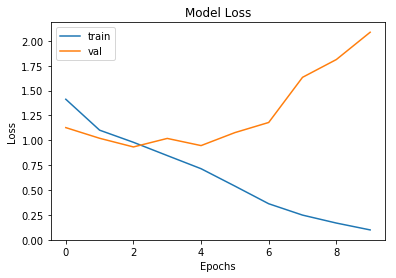

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

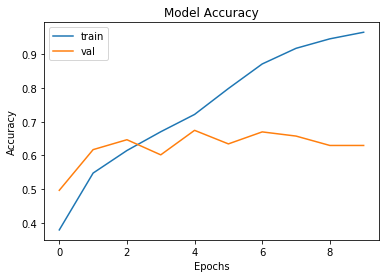

In [0]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()


In [0]:
pred=model_1.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [0]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [0]:
pred[:3]

array([[4.9614703e-18, 1.4481356e-16, 1.0000000e+00, 3.3102156e-16,
        1.0205328e-11],
       [7.9734258e-05, 2.0049376e-04, 9.9789858e-01, 4.0901057e-05,
        1.7802337e-03],
       [1.3338437e-19, 3.4353290e-13, 3.5308096e-09, 3.8693679e-17,
        1.0000000e+00]], dtype=float32)

In [0]:
y_test[:3]

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [0]:
pred_digits[:3]

array([2, 2, 4])

In [0]:
prop_class[:3]

[1, 2, 5]

In [0]:
y_test[prop_class[1]]

array([0., 0., 0., 0., 1.], dtype=float32)

In [0]:
[np.argmax(y_test[1])]

[2]

In [0]:
le.inverse_transform([[np.argmax(y_test[1])]])

array(['Rose'], dtype='<U9')

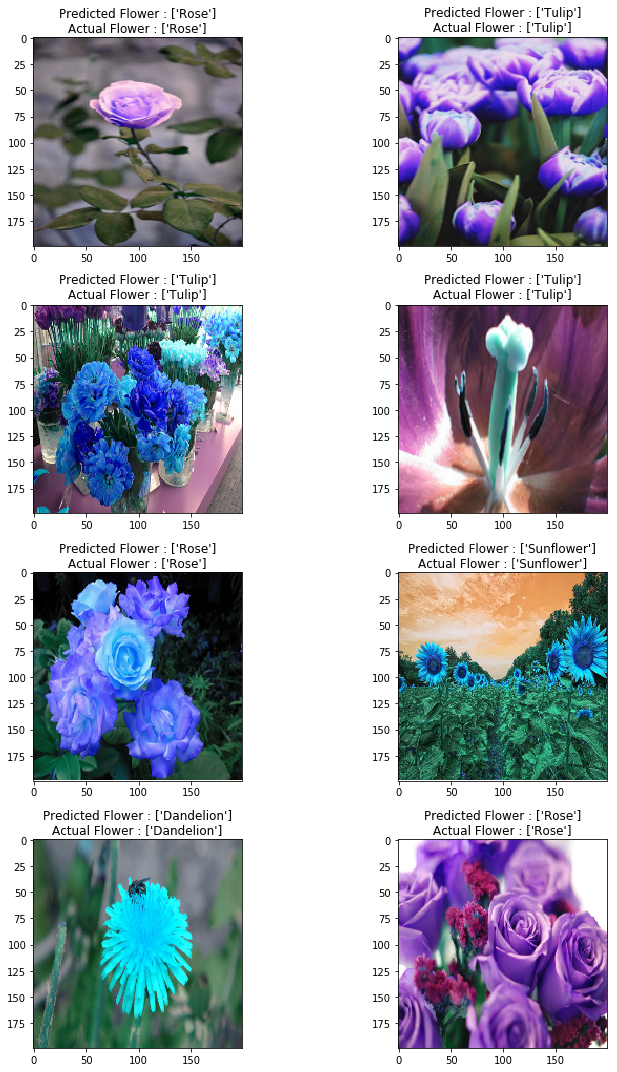

In [0]:


count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+
                          str(le.inverse_transform([pred_digits[prop_class[count]]])) +
                          "\n"+"Actual Flower : " + 
                          str(le.inverse_transform([np.argmax([y_test[prop_class[count]]]) ])) )
        plt.tight_layout()
        count+=1

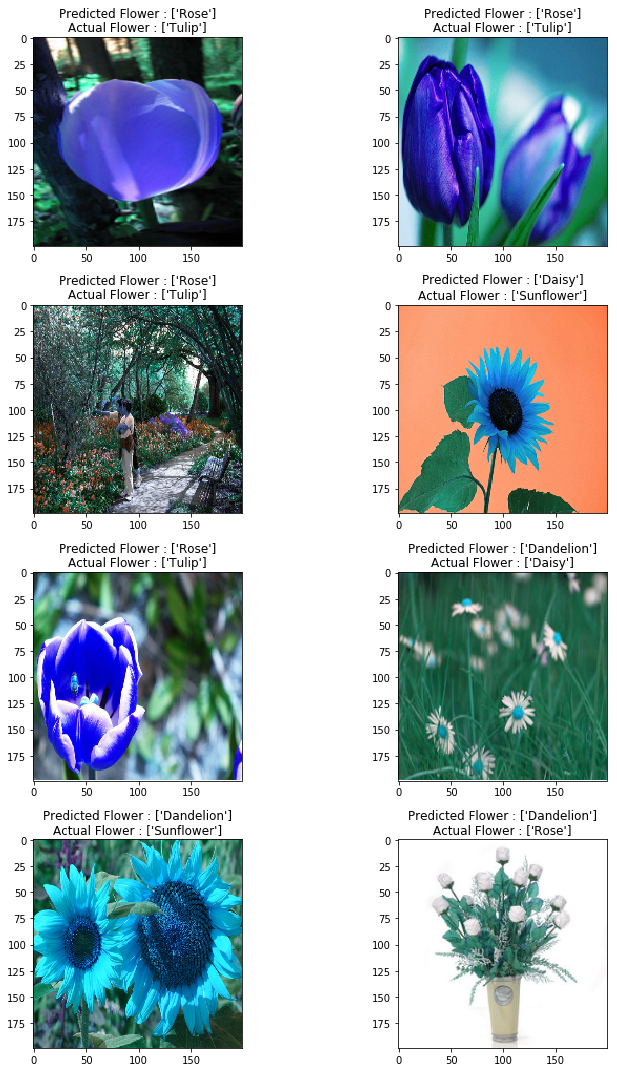

In [0]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+
                          str(le.inverse_transform([pred_digits[mis_class[count]]]))+
                          "\n"+"Actual Flower : "+
                          str(le.inverse_transform([np.argmax([y_test[mis_class[count]]]) ])) )
        plt.tight_layout()
        count+=1

In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False)  


datagen.fit(x_train)

In [0]:
batch_size = 16
epochs = 10

In [0]:
History = model_1.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

W0822 08:22:42.949339 140259910842240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0822 08:22:43.026849 140259910842240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
189/189 [==============================] - 33s 173ms/step - loss: 1.3792 - acc: 0.3945 - val_loss: 1.3274 - val_acc: 0.4352
Epoch 2/10
189/189 [==============================] - 24s 127ms/step - loss: 1.1163 - acc: 0.5360 - val_loss: 0.9428 - val_acc: 0.6451
Epoch 3/10
189/189 [==============================] - 24s 128ms/step - loss: 1.0258 - acc: 0.5899 - val_loss: 0.9652 - val_acc: 0.6204
Epoch 4/10
189/189 [==============================] - 24s 129ms/step - loss: 0.9583 - acc: 0.6323 - val_loss: 0.9220 - val_acc: 0.6620
Epoch 5/10
189/189 [==============================] - 24s 128ms/step - loss: 0.9090 - acc: 0.6554 - val_loss: 0.8921 - val_acc: 0.6790
Epoch 6/10
189/189 [==============================] - 24s 129ms/step - loss: 0.8449 - acc: 0.6815 - val_loss: 0.8034 - val_acc: 0.6790
Epoch 7/10
189/189 [==============================] - 25s 130ms/step - loss: 0.8412 - acc: 0.6739 - val_loss: 0.7840 - val_acc: 0.7176
Epoch 8/10
189/189 [==============================] - 2

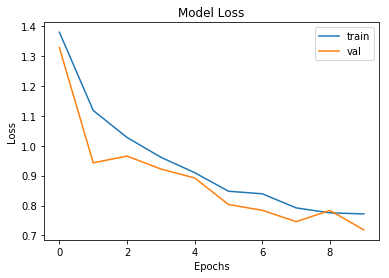

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

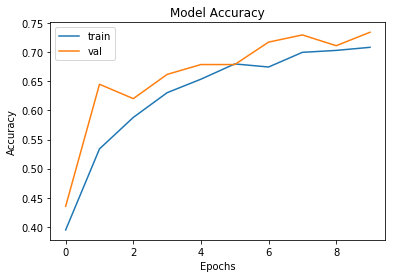

In [0]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [0]:
pred=model_1.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [0]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

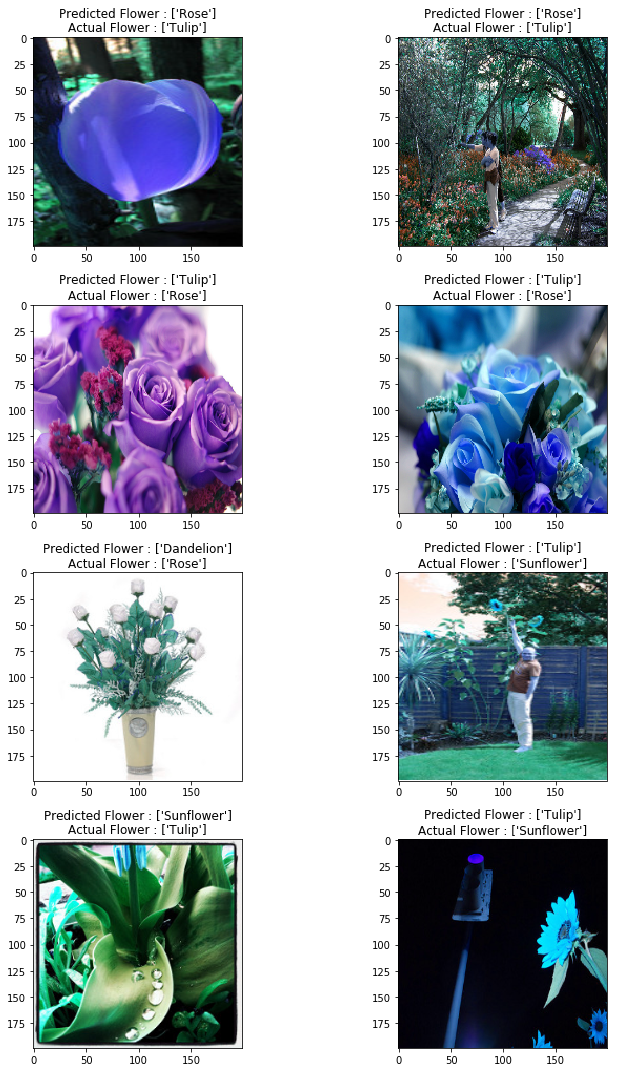

In [0]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+
                          str(le.inverse_transform([pred_digits[mis_class[count]]]))+
                          "\n"+"Actual Flower : "+
                          str(le.inverse_transform([np.argmax([y_test[mis_class[count]]]) ])) )
        plt.tight_layout()
        count+=1

In [0]:
!nvidia-smi

Thu Aug 22 08:32:34 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    26W /  70W |   2641MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!kill process_id

/bin/bash: line 0: kill: process_id: arguments must be process or job IDs


In [0]:
from tensorflow.python.keras.applications import ResNet50
import tensorflow

In [0]:
model_2 = tensorflow.keras.Sequential()
model_2.add(tensorflow.keras.applications.ResNet50(include_top=False, pooling='avg', 
                                                   weights='imagenet', input_shape = (IMG_SIZE, IMG_SIZE, 3) ))
model_2.add(tensorflow.keras.layers.Dense(5, activation='softmax'))

model_2.layers[0].trainable = False


W0822 08:57:03.956232 140267563050880 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model_2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 5)                 10245     
Total params: 23,597,957
Trainable params: 10,245
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
History = model_2.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
189/189 [==============================] - 14s 76ms/step - loss: 0.8942 - acc: 0.6555 - val_loss: 1.6386 - val_acc: 0.2454
Epoch 2/10
189/189 [==============================] - 10s 51ms/step - loss: 0.6380 - acc: 0.7561 - val_loss: 1.8811 - val_acc: 0.2485
Epoch 3/10
189/189 [==============================] - 10s 50ms/step - loss: 0.6056 - acc: 0.7811 - val_loss: 1.7522 - val_acc: 0.2562
Epoch 4/10
189/189 [==============================] - 10s 53ms/step - loss: 0.5338 - acc: 0.8086 - val_loss: 1.8546 - val_acc: 0.1790
Epoch 5/10
189/189 [==============================] - 10s 54ms/step - loss: 0.5257 - acc: 0.8179 - val_loss: 1.9014 - val_acc: 0.1590
Epoch 6/10
189/189 [==============================] - 10s 52ms/step - loss: 0.5328 - acc: 0.8047 - val_loss: 1.7247 - val_acc: 0.1574
Epoch 7/10
189/189 [==============================] - 9s 50ms/step - loss: 0.5159 - acc: 0.8110 - val_loss: 1.8776 - val_acc: 0.1775
Epoch 8/10
189/189 [==============================] - 9s 50ms/s

In [0]:
model_3 = tensorflow.keras.Sequential()
model_3.add(tensorflow.keras.applications.ResNet50(include_top=False, pooling='avg', 
                                                   weights='imagenet', input_shape = (IMG_SIZE, IMG_SIZE, 3) ))
model_3.add(tensorflow.keras.layers.Dense(5, activation='softmax'))

model_3.layers[0].trainable = False


In [0]:
model_3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
History = model_3.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), verbose=1)

Train on 3026 samples, validate on 648 samples
Epoch 1/20
3026/3026 [==============================] - 7s 2ms/sample - loss: 0.9022 - acc: 0.6606 - val_loss: 1.7762 - val_acc: 0.1790
Epoch 2/20
3026/3026 [==============================] - 4s 1ms/sample - loss: 0.5188 - acc: 0.8113 - val_loss: 1.7695 - val_acc: 0.1790
Epoch 3/20
3026/3026 [==============================] - 4s 1ms/sample - loss: 0.4336 - acc: 0.8443 - val_loss: 1.9914 - val_acc: 0.1790
Epoch 4/20
3026/3026 [==============================] - 4s 1ms/sample - loss: 0.3636 - acc: 0.8744 - val_loss: 1.9011 - val_acc: 0.1790
Epoch 5/20
3026/3026 [==============================] - 4s 1ms/sample - loss: 0.3318 - acc: 0.8810 - val_loss: 1.7048 - val_acc: 0.1713
Epoch 6/20
3026/3026 [==============================] - 4s 1ms/sample - loss: 0.3057 - acc: 0.8982 - val_loss: 1.7530 - val_acc: 0.1790
Epoch 7/20
3026/3026 [==============================] - 4s 1ms/sample - loss: 0.2688 - acc: 0.9108 - val_loss: 1.8568 - val_acc: 0.1713
E

In [0]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator


In [0]:
cd ..

/content


In [0]:
mkdir ./flowers_val/tulip

In [0]:
import shutil

In [0]:
files = os.listdir('./flowers_test/dandelion')

In [0]:
files[:5]

[]

In [0]:
dandelion = "./flowers/dandelion"
daisy = "./flowers/daisy"
rose = "./flowers/rose"
sunflower = "./flowers/sunflower"
tulip = "./flowers/tulip"

dandelion_val = "./flowers_val/dandelion"
daisy_val = "./flowers_val/daisy"
rose_val = "./flowers_val/rose"
sunflower_val = "./flowers_val/sunflower"
tulip_val = "./flowers_val/tulip"

dandelion_test = "./flowers_test/dandelion"
daisy_test = "./flowers_test/daisy"
rose_test = "./flowers_test/rose"
sunflower_test = "./flowers_test/sunflower"
tulip_test = "./flowers_test/tulip"




In [0]:
def moveall(source1, dest1):
  files = os.listdir(source1)
  for f in files:
      shutil.move(source1 + '/'+ f, dest1 + '/'+ f)

In [0]:

def make_dir_structure(source1, dest1, dest2):
  files = os.listdir(source1)
  for f in files:
      i = np.random.rand(1)
      if  i < 0.3:
        if i < 0.15:
          shutil.move(source1 + '/'+ f, dest1 + '/'+ f)
        else:
          shutil.move(source1 + '/'+ f, dest2 + '/'+ f)

In [0]:
make_dir_structure(tulip, tulip_test, tulip_val)

In [0]:
image_size = 99
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


In [168]:
train_generator = data_generator.flow_from_directory(
        './flowers/',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        './flowers_val/',
        target_size=(image_size, image_size),
        class_mode='categorical')


Found 3074 images belonging to 5 classes.
Found 672 images belonging to 5 classes.


In [169]:
test_generator = data_generator.flow_from_directory(
        './flowers_test/',
        target_size=(image_size, image_size),
        class_mode='categorical')


Found 577 images belonging to 5 classes.


In [0]:
model_4 = tensorflow.keras.Sequential()
model_4.add(tensorflow.keras.applications.ResNet50(include_top=False, pooling='avg', 
                                                   weights='imagenet', input_shape = (299, 299, 3) ))
model_4.add(tensorflow.keras.layers.Dense(5, activation='softmax'))
model_4.layers[0].trainable = False

model_4.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10245     
Total params: 23,597,957
Trainable params: 10,245
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
History = model_4.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), verbose=1)

In [0]:
History = model_4.fit_generator(
          train_generator,
          epochs = 20,
          validation_data=validation_generator,
          verbose = 1)

Epoch 1/20
129/129 [==============================] - 27s 211ms/step - loss: 0.5445 - acc: 0.8097 - val_loss: 0.6055 - val_acc: 0.7768
Epoch 2/20
129/129 [==============================] - 27s 210ms/step - loss: 0.3241 - acc: 0.8962 - val_loss: 0.5461 - val_acc: 0.7932
Epoch 3/20
129/129 [==============================] - 27s 208ms/step - loss: 0.2555 - acc: 0.9138 - val_loss: 0.5159 - val_acc: 0.8051
Epoch 4/20
129/129 [==============================] - 27s 207ms/step - loss: 0.2342 - acc: 0.9239 - val_loss: 0.4949 - val_acc: 0.8259
Epoch 5/20
129/129 [==============================] - 27s 208ms/step - loss: 0.2177 - acc: 0.9281 - val_loss: 0.4541 - val_acc: 0.8408
Epoch 6/20
129/129 [==============================] - 27s 208ms/step - loss: 0.1885 - acc: 0.9343 - val_loss: 0.4896 - val_acc: 0.8348
Epoch 7/20
129/129 [==============================] - 27s 209ms/step - loss: 0.1611 - acc: 0.9499 - val_loss: 0.4972 - val_acc: 0.8095
Epoch 8/20
129/129 [==============================] - 2

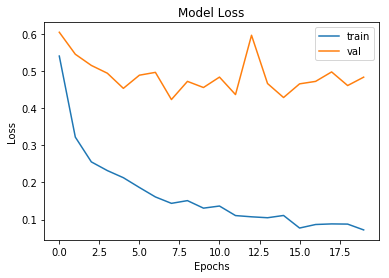

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

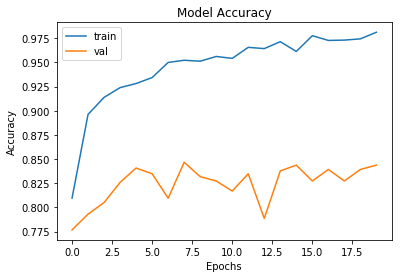

In [0]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

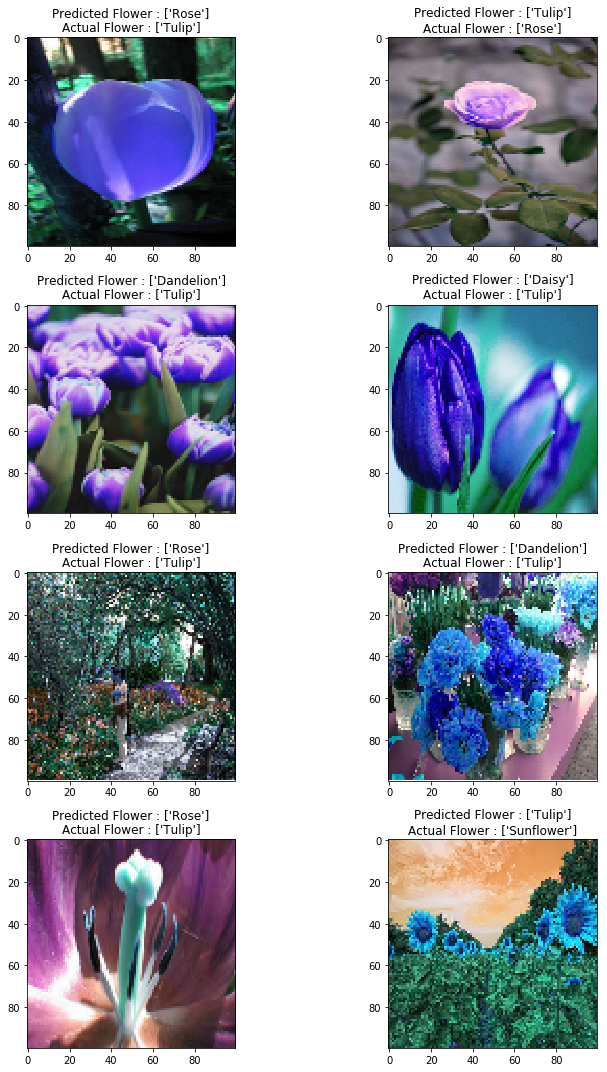

In [114]:
pred=model_4.predict(test_generator)
pred_digits=np.argmax(pred,axis=1)

i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break
        
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+
                          str(le.inverse_transform([pred_digits[mis_class[count]]]))+
                          "\n"+"Actual Flower : "+
                          str(le.inverse_transform([np.argmax([y_test[mis_class[count]]]) ])) )
        plt.tight_layout()
        count+=1

In [0]:
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)


In [116]:
train_generator_with_aug = data_generator_with_aug.flow_from_directory(
        './flowers/',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')


Found 3074 images belonging to 5 classes.


In [0]:
model_5 = tensorflow.keras.Sequential()
model_5.add(tensorflow.keras.applications.ResNet50(include_top=False, pooling='avg', 
                                                   weights='imagenet', input_shape = (299, 299, 3) ))
model_5.add(tensorflow.keras.layers.Dense(5, activation='softmax'))
model_5.layers[0].trainable = False

model_5.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [118]:
History = model_5.fit_generator(
          train_generator_with_aug,
          epochs = 20,
          validation_data=validation_generator,
          verbose = 1)

Epoch 1/20
129/129 [==============================] - 71s 552ms/step - loss: 0.6893 - acc: 0.7404 - val_loss: 0.5859 - val_acc: 0.7738
Epoch 2/20
129/129 [==============================] - 63s 486ms/step - loss: 0.3714 - acc: 0.8751 - val_loss: 0.6359 - val_acc: 0.7470
Epoch 3/20
129/129 [==============================] - 64s 499ms/step - loss: 0.3356 - acc: 0.8881 - val_loss: 0.4667 - val_acc: 0.8125
Epoch 4/20
129/129 [==============================] - 64s 500ms/step - loss: 0.3189 - acc: 0.8975 - val_loss: 0.5072 - val_acc: 0.7946
Epoch 5/20
129/129 [==============================] - 64s 496ms/step - loss: 0.2848 - acc: 0.9014 - val_loss: 0.4757 - val_acc: 0.8199
Epoch 6/20
129/129 [==============================] - 64s 494ms/step - loss: 0.2415 - acc: 0.9203 - val_loss: 0.4955 - val_acc: 0.8140
Epoch 7/20
129/129 [==============================] - 63s 491ms/step - loss: 0.2334 - acc: 0.9180 - val_loss: 0.4201 - val_acc: 0.8318
Epoch 8/20
129/129 [==============================] - 6

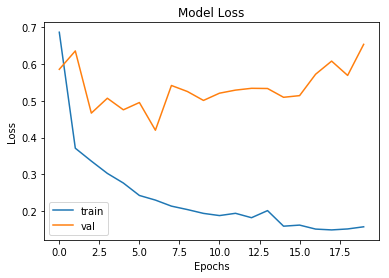

In [119]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

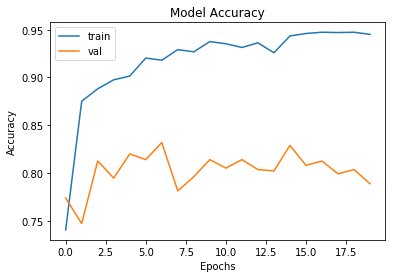

In [120]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [0]:
n_classes = 5
train_dataset_length = 3074
val_dataset_length = 672
train_batch_size = 8
val_batch_size = 8

In [0]:
def make_model( 
    n_classes,
    input_shape,
    dropout_rate=0.0, 
    l1=1e-8,
    l2=1e-8,):
  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.applications.ResNet50(include_top=False, pooling='avg', 
                                                     weights='imagenet', input_shape = input_shape ))
  model.add(tensorflow.keras.layers.BatchNormalization())
  model.add(tensorflow.keras.layers.Dropout(dropout_rate))
  model.add(tensorflow.keras.layers.Dense(n_classes, kernel_regularizer=tensorflow.keras.regularizers.l1_l2(l1, l2), 
                                          activation=tensorflow.keras.activations.softmax))
  
  return model

In [0]:
import skopt
import keras

In [0]:
dimensions = [
    skopt.space.Categorical([
        tensorflow.keras.optimizers.Adam,
        tensorflow.keras.optimizers.Nadam,
        tensorflow.keras.optimizers.RMSprop,
    ], name='optimizer'),
    skopt.space.Real(low=1e-6, high=1e-3, prior='log-uniform', name='lr'),
    skopt.space.Real(low=0., high=0.5, name='dropout'),
    skopt.space.Real(low=1e-8, high=1e-2, prior='log-uniform', name='l1_reg'),
    skopt.space.Real(low=1e-8, high=1e-2, prior='log-uniform', name='l2_reg'),
    skopt.space.Integer(low=6, high=30, name='epochs'),
    skopt.space.Integer(low=0, high=10, name='easing_epochs'),
]

In [0]:
default_parameters = [tensorflow.keras.optimizers.Nadam, 3e-4, 0.4, 3e-6, 3e-5, 20, 3]

In [0]:
mkdir ./temp

In [138]:
cd ..

/content


In [143]:
ls

flowers/                 flowers_test/  sample_data/
flowers-recognition.zip  flowers_val/   temp/


In [0]:
best_accuracy = 0.0
best_model_arch_path = str('temp/best_model.json')
best_model_weights_path = str('temp/best_model.h5')

In [0]:
def train_model(model, optimizer, lr, epochs, easing_epochs):
    if easing_epochs:
        for layer in model.layers[:-1]:
            layer.trainable = False

        model.compile(
            optimizer=optimizer(lr),
            loss=tensorflow.keras.losses.categorical_crossentropy,
            metrics=[
                tensorflow.keras.metrics.categorical_accuracy,
            ],
        )
        
        easing_reduce_lr_patience = min(1, easing_epochs // 3)
        easing_early_stopping_patience = min(1, easing_epochs // 2)

        model.fit(
            x=train_generator,
            steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
            validation_data=validation_generator,
            validation_steps=math.ceil(val_dataset_length/val_batch_size),
            epochs=easing_epochs,
            callbacks=[
                tensorflow.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=easing_reduce_lr_patience),
                tensorflow.keras.callbacks.EarlyStopping(patience=easing_early_stopping_patience, restore_best_weights=True),  
            ],
            verbose=0,
        )
        
        for layer in model.layers:
            layer.trainable = True
        
    model.compile(
        optimizer=optimizer(lr),
        loss=tensorflow.keras.losses.categorical_crossentropy,
        metrics=[
            tensorflow.keras.metrics.categorical_accuracy,
        ],
    )
    
    reduce_lr_patience = max(5, epochs // 4)
    early_stopping_patience = max(10, epochs // 2)

    history = model.fit(
        x=train_generator,
        steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
        validation_data=validation_generator,
        validation_steps=math.ceil(val_dataset_length/val_batch_size),
        epochs=epochs,
        callbacks=[
            tensorflow.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=reduce_lr_patience),
            tensorflow.keras.callbacks.EarlyStopping(patience=early_stopping_patience, restore_best_weights=True),  
        ],
        verbose=1,
    )
    
    return history

In [0]:
input_shape = (99, 99, 3)

@skopt.utils.use_named_args(dimensions=dimensions)
def fitness(
    optimizer,
    lr,
    dropout,
    l1_reg,
    l2_reg,
    epochs,
    easing_epochs,
):  
    model = make_model(
        n_classes,
        input_shape,
        dropout,
        l1_reg,
        l2_reg,
    )
    
    history = train_model(model, optimizer, lr, epochs, easing_epochs)

    accuracy = max(history.history["val_sparse_categorical_accuracy"])

    print("\nAccuracy: {0:.2%}\n".format(accuracy))

    global best_accuracy

    if accuracy > best_accuracy:
        print('Best model'.center(80, '-'))
        print("Accuracy: {0:.4%}".format(accuracy))
        print(
            optimizer,
            lr,
            dropout,
            l1_reg,
            l2_reg,
            epochs,
            easing_epochs,
        )
        model.save_weights(best_model_weights_path)
        with open(best_model_arch_path, "w") as f:
            f.write(model.to_json())
        best_accuracy = accuracy

    del model

    keras.backend.clear_session()

    return -accuracy

In [0]:
search_result = skopt.gp_minimize(
    func=fitness,
    dimensions=dimensions,
    acq_func='EI',
    n_calls=11,
    x0=default_parameters,
)

Epoch 1/20
385/385 [==============================] - 114s 295ms/step - loss: 0.5457 - categorical_accuracy: 0.8268 - val_loss: 1.1412 - val_categorical_accuracy: 0.7500
Epoch 2/20
385/385 [==============================] - 64s 167ms/step - loss: 0.2563 - categorical_accuracy: 0.9278 - val_loss: 0.6638 - val_categorical_accuracy: 0.7976
Epoch 3/20
385/385 [==============================] - 64s 167ms/step - loss: 0.1713 - categorical_accuracy: 0.9509 - val_loss: 0.8190 - val_categorical_accuracy: 0.7798
Epoch 4/20
385/385 [==============================] - 64s 166ms/step - loss: 0.1730 - categorical_accuracy: 0.9526 - val_loss: 0.6415 - val_categorical_accuracy: 0.8244
Epoch 5/20
385/385 [==============================] - 64s 166ms/step - loss: 0.1523 - categorical_accuracy: 0.9591 - val_loss: 0.9654 - val_categorical_accuracy: 0.7946
Epoch 6/20
385/385 [==============================] - 64s 166ms/step - loss: 0.0624 - categorical_accuracy: 0.9793 - val_loss: 0.6288 - val_categorical_ac